### Deep Learning 기반의 손글씨 예측하기


https://www.tensorflow.org/tutorials/quickstart/beginner

- 데이터 로딩

In [72]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [73]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [74]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [75]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [76]:
test_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 224,   0,
          0,   0,   0,   0,   0,   0,  70,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  

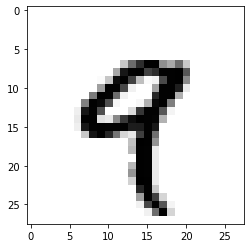

In [77]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary);  #흑백 따라서 binary로 하면 된다

In [78]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [79]:
# 열은 28*28 
# 가중치 곱해서 더하고 변환해야 함 - 값이 253등 크면 값이 너무 커서 가중치도 너무 크게 연산, 
# 따라서 스케일 조절 따라서 255로 나누기

train_images = train_images.astype('float32').reshape(len(train_images), 28*28)/255
test_images = test_images.astype('float32').reshape(len(test_images), 28*28)/255

print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [80]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [81]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [82]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [83]:
train_images.shape

(60000, 784)

In [84]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))  # 일반적으로 2의 제곱 권장, GPU가 조아함
model.add(Dense(10, activation='softmax'))  # 다중분류일때 사용, 이진분류일 경우 ㄷ
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [85]:
'''
categorical_crossentropy

다중 분류 손실 함수
출력 값이 one-hot encoding된 결과로 나온다. 

metrics=['accuracy'] 추가로 정확도 확인
'''


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
train_images.shape, train_labels.shape

((60000, 784), (60000, 10))

In [87]:
# 학습

model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.4270 - accuracy: 0.8767
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1111 - accuracy: 0.9661
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0376 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0277 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0157 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0130 - accuracy: 0.9965
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0096 - accuracy: 0.9974

In [88]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9822


In [89]:
test_acc

0.982200026512146